In [1]:
%matplotlib inline

import numpy as np
import xarray as xr
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import nc_time_axis

#from cmip6_preprocessing.preprocessing import full_preprocessing

import intake

# util.py is in the local directory
# it contains code that is common across project notebooks
# or routines that are too extensive and might otherwise clutter
# the notebook design
import util 

/srv/conda/envs/notebook/lib/python3.7/site-packages/intake/source/discovery.py:136: FutureWarning: The drivers ['stac-catalog', 'stac-collection', 'stac-item'] do not specify entry_points and were only discovered via a package scan. This may break in a future release of intake. The packages should be updated.
  FutureWarning)


In [2]:
if util.is_ncar_host():
    col = intake.open_esm_datastore("../catalogs/glade-cmip6.json")
else:
    col = intake.open_esm_datastore("../catalogs/pangeo-cmip6.json")
col

pangeo-cmip6-ESM Collection with 28660 entries:
	> 10 activity_id(s)

	> 23 institution_id(s)

	> 48 source_id(s)

	> 29 experiment_id(s)

	> 86 member_id(s)

	> 23 table_id(s)

	> 190 variable_id(s)

	> 7 grid_label(s)

	> 28660 zstore(s)

	> 59 dcpp_init_year(s)

In [3]:
col.df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year
0,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,pr,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN
1,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,prsn,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN
2,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,tas,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN
3,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,tasmax,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN
4,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,tasmin,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN


In [4]:
col.df.columns

Index(['activity_id', 'institution_id', 'source_id', 'experiment_id',
       'member_id', 'table_id', 'variable_id', 'grid_label', 'zstore',
       'dcpp_init_year'],
      dtype='object')

In [5]:
import pprint 
uni_dict = col.unique(['source_id', 'experiment_id', 'table_id'])
pprint.pprint(uni_dict, compact=True)

{'experiment_id': {'count': 29,
                   'values': ['ssp370', 'esm-ssp585', '1pctCO2-bgc', 'hist-bgc',
                              '1pctCO2', 'abrupt-4xCO2', 'historical',
                              'piControl', 'amip', 'esm-hist', 'esm-piControl',
                              'hist-GHG', 'hist-aer', 'hist-nat', 'dcppA-assim',
                              'dcppA-hindcast', 'dcppC-hindcast-noAgung',
                              'dcppC-hindcast-noElChichon',
                              'dcppC-hindcast-noPinatubo', 'highresSST-present',
                              'control-1950', 'hist-1950', 'deforest-globe',
                              'esm-ssp585-ssp126Lu', 'omip1', 'lgm', 'ssp126',
                              'ssp245', 'ssp585']},
 'source_id': {'count': 48,
               'values': ['BCC-ESM1', 'BCC-CSM2-MR', 'CanESM5', 'CNRM-ESM2-1',
                          'UKESM1-0-LL', 'GISS-E2-1-G', 'CESM2', 'GFDL-ESM4',
                          'AWI-CM-1-1-MR', 'CAM

In [6]:
print(col.unique(['variable_id']))

{'variable_id': {'count': 190, 'values': ['pr', 'prsn', 'tas', 'tasmax', 'tasmin', 'ts', 'ua', 'va', 'cLeaf', 'cVeg', 'gpp', 'lai', 'npp', 'ra', 'tran', 'chl', 'detoc', 'diftrblo', 'difvho', 'difvso', 'dissic', 'dissicabio', 'dissicnat', 'fgco2', 'fgco2abio', 'fgco2nat', 'no3', 'o2', 'phyc', 'phyn', 'pon', 'talk', 'zooc', 'nbp', 'fgo2', 'hfds', 'sos', 'tos', 'calc', 'dfe', 'dissoc', 'expc', 'expn', 'expp', 'expsi', 'graz', 'nh4', 'ph', 'phydiat', 'phydiaz', 'phypico', 'pnitrate', 'po4', 'pp', 'remoc', 'si', 'hus', 'psl', 'ta', 'zg', 'mlotst', 'so', 'tauuo', 'tauvo', 'thetao', 'thetaoga', 'uo', 'vo', 'volo', 'wo', 'zos', 'sithick', 'huss', 'rlds', 'rlus', 'hfls', 'uas', 'vas', 'ps', 'ch4', 'clt', 'co2', 'evspsbl', 'hfss', 'hurs', 'o3', 'prw', 'rlut', 'rlutcs', 'rsds', 'rsdt', 'rsus', 'rsut', 'rsutcs', 'tauu', 'tauv', 'snc', 'snw', 'cLitterAbove', 'cLitterBelow', 'cRoot', 'cSoilFast', 'cSoilMedium', 'cSoilSlow', 'mrro', 'mrros', 'mrso', 'mrsos', 'rh', 'tsl', 'masscello', 'masso', 'thkcel

In [7]:
variable='tos'
freq='Omon'

In [8]:
cat = col.search(experiment_id=['historical'], table_id=freq, variable_id=variable, grid_label='gn')
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year
171,CMIP,AWI,AWI-CM-1-1-MR,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP/AWI/AWI-CM-1-1-MR/historical/r...,NaN
328,CMIP,BCC,BCC-CSM2-MR,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP/BCC/BCC-CSM2-MR/historical/r1i...,NaN
591,CMIP,BCC,BCC-ESM1,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP/BCC/BCC-ESM1/historical/r1i1p1...,NaN
842,CMIP,CAMS,CAMS-CSM1-0,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP/CAMS/CAMS-CSM1-0/historical/r1...,NaN
1462,CMIP,CCCma,CanESM5,historical,r10i1p1f1,Omon,tos,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r10i1...,NaN
4483,CMIP,CNRM-CERFACS,CNRM-CM6-1,historical,r10i1p1f2,Omon,tos,gn,gs://cmip6/CMIP/CNRM-CERFACS/CNRM-CM6-1/histor...,NaN
5421,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r2i1p1f2,Omon,tos,gn,gs://cmip6/CMIP/CNRM-CERFACS/CNRM-ESM2-1/histo...,NaN
6036,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP/EC-Earth-Consortium/EC-Earth3-...,NaN
6207,CMIP,EC-Earth-Consortium,EC-Earth3,historical,r2i1p1f1,Omon,tos,gn,gs://cmip6/CMIP/EC-Earth-Consortium/EC-Earth3/...,NaN
6549,CMIP,IPSL,IPSL-CM6A-LR,historical,r10i1p1f1,Omon,tos,gn,gs://cmip6/CMIP/IPSL/IPSL-CM6A-LR/historical/r...,NaN


In [9]:
models = set(uni_dict['source_id']['values']) # all the models

for experiment_id in ['historical', 'ssp585']:
    query = dict(experiment_id=experiment_id, table_id=freq, 
                 variable_id=variable, grid_label='gn')  
    cat = col.search(**query)
    models = models.intersection({model for model in cat.df.source_id.unique().tolist()})

# ensure the CESM2 models are not included (oxygen was erroneously submitted to the archive)
# models = models - {'CESM2-WACCM', 'CESM2'}

models = list(models)
models

['MIROC6',
 'UKESM1-0-LL',
 'CNRM-ESM2-1',
 'CNRM-CM6-1',
 'CESM2',
 'IPSL-CM6A-LR',
 'CAMS-CSM1-0',
 'BCC-CSM2-MR',
 'CanESM5',
 'MRI-ESM2-0',
 'GFDL-CM4',
 'MIROC-ES2L']

In [41]:
cat = col.search(experiment_id=['historical'], table_id=freq, 
                 variable_id=variable, grid_label='gn')
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year
171,CMIP,AWI,AWI-CM-1-1-MR,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP/AWI/AWI-CM-1-1-MR/historical/r...,NaN
328,CMIP,BCC,BCC-CSM2-MR,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP/BCC/BCC-CSM2-MR/historical/r1i...,NaN
591,CMIP,BCC,BCC-ESM1,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP/BCC/BCC-ESM1/historical/r1i1p1...,NaN
842,CMIP,CAMS,CAMS-CSM1-0,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP/CAMS/CAMS-CSM1-0/historical/r1...,NaN
1462,CMIP,CCCma,CanESM5,historical,r10i1p1f1,Omon,tos,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r10i1...,NaN
4483,CMIP,CNRM-CERFACS,CNRM-CM6-1,historical,r10i1p1f2,Omon,tos,gn,gs://cmip6/CMIP/CNRM-CERFACS/CNRM-CM6-1/histor...,NaN
5421,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r2i1p1f2,Omon,tos,gn,gs://cmip6/CMIP/CNRM-CERFACS/CNRM-ESM2-1/histo...,NaN
6036,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP/EC-Earth-Consortium/EC-Earth3-...,NaN
6207,CMIP,EC-Earth-Consortium,EC-Earth3,historical,r2i1p1f1,Omon,tos,gn,gs://cmip6/CMIP/EC-Earth-Consortium/EC-Earth3/...,NaN
6549,CMIP,IPSL,IPSL-CM6A-LR,historical,r10i1p1f1,Omon,tos,gn,gs://cmip6/CMIP/IPSL/IPSL-CM6A-LR/historical/r...,NaN


In [11]:
dset_dict = cat.to_dataset_dict(zarr_kwargs={'consolidated': True})

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'

--> There will be 24 group(s)


In [12]:
print(dset_dict.keys())

dict_keys(['CMIP.AWI.AWI-CM-1-1-MR.historical.Omon.gn', 'CMIP.BCC.BCC-CSM2-MR.historical.Omon.gn', 'CMIP.BCC.BCC-ESM1.historical.Omon.gn', 'CMIP.CAMS.CAMS-CSM1-0.historical.Omon.gn', 'CMIP.CCCma.CanESM5.historical.Omon.gn', 'CMIP.CNRM-CERFACS.CNRM-CM6-1.historical.Omon.gn', 'CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Omon.gn', 'CMIP.EC-Earth-Consortium.EC-Earth3.historical.Omon.gn', 'CMIP.EC-Earth-Consortium.EC-Earth3-Veg.historical.Omon.gn', 'CMIP.IPSL.IPSL-CM6A-LR.historical.Omon.gn', 'CMIP.MIROC.MIROC-ES2L.historical.Omon.gn', 'CMIP.MIROC.MIROC6.historical.Omon.gn', 'CMIP.MOHC.HadGEM3-GC31-LL.historical.Omon.gn', 'CMIP.MOHC.UKESM1-0-LL.historical.Omon.gn', 'CMIP.MRI.MRI-ESM2-0.historical.Omon.gn', 'CMIP.NASA-GISS.GISS-E2-1-G.historical.Omon.gn', 'CMIP.NASA-GISS.GISS-E2-1-G-CC.historical.Omon.gn', 'CMIP.NASA-GISS.GISS-E2-1-H.historical.Omon.gn', 'CMIP.NCAR.CESM2.historical.Omon.gn', 'CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gn', 'CMIP.NOAA-GFDL.GFDL-ESM4.historical.Omon.gn', 'CMIP.NUIST

In [42]:
dset_dict['CMIP.NOAA-GFDL.GFDL-ESM4.historical.Omon.gn']

<xarray.Dataset>
Dimensions:    (bnds: 2, member_id: 1, time: 1980, vertex: 4, x: 720, y: 576)
Coordinates:
  * y          (y) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * x          (x) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * bnds       (bnds) float64 1.0 2.0
  * member_id  (member_id) <U8 'r1i1p1f1'
Dimensions without coordinates: vertex
Data variables:
    lat        (y, x) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    lon_bnds   (y, x, vertex) float32 dask.array<chunksize=(576, 720, 4), meta=np.ndarray>
    lon        (y, x) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    time_bnds  (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
    lat_bnds   (y, x, vertex) float32 dask.array<chunksize=(576, 720, 4), meta=np.ndarray>
    tos        (member_id, time, y, x) float32 dask.array<chunksize=(1, 120, 576, 720), meta=np.ndarray>

In [27]:
for m in dset_dict.keys():
    print(m,dset_dict[m].dims)

CMIP.AWI.AWI-CM-1-1-MR.historical.Omon.gn Frozen(SortedKeysDict({'ncells': 830305, 'vertices': 16, 'time': 1980, 'bnds': 2, 'member_id': 1}))
CMIP.BCC.BCC-CSM2-MR.historical.Omon.gn Frozen(SortedKeysDict({'lat': 232, 'lon': 360, 'bnds': 2, 'time': 1980, 'member_id': 1}))
CMIP.BCC.BCC-ESM1.historical.Omon.gn Frozen(SortedKeysDict({'lat': 232, 'lon': 360, 'bnds': 2, 'time': 1980, 'member_id': 1}))
CMIP.CAMS.CAMS-CSM1-0.historical.Omon.gn Frozen(SortedKeysDict({'j': 200, 'i': 360, 'vertices': 4, 'time': 1980, 'bnds': 2, 'member_id': 1}))
CMIP.CCCma.CanESM5.historical.Omon.gn Frozen(SortedKeysDict({'j': 291, 'i': 360, 'vertices': 4, 'time': 1980, 'bnds': 2, 'member_id': 1}))
CMIP.CNRM-CERFACS.CNRM-CM6-1.historical.Omon.gn Frozen(SortedKeysDict({'y': 294, 'x': 362, 'nvertex': 4, 'time': 1980, 'axis_nbounds': 2, 'member_id': 1}))
CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Omon.gn Frozen(SortedKeysDict({'y': 294, 'x': 362, 'nvertex': 4, 'time': 1980, 'axis_nbounds': 2, 'member_id': 1}))
CMIP.EC

In [39]:
model_grids={'CMIP.BCC.BCC-CSM2-MR.historical.Omon.gn': ['lon','lat'],
             'CMIP.BCC.BCC-ESM1.historical.Omon.gn': ['lon','lat'],
             'CMIP.CAMS.CAMS-CSM1-0.historical.Omon.gn': ['i','j'],
             'CMIP.CCCma.CanESM5.historical.Omon.gn': ['i','j'],
             'CMIP.CNRM-CERFACS.CNRM-CM6-1.historical.Omon.gn': ['x','y'], 
             'CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Omon.gn': ['x','y'],
             'CMIP.EC-Earth-Consortium.EC-Earth3.historical.Omon.gn': ['i','j'],
             'CMIP.EC-Earth-Consortium.EC-Earth3-Veg.historical.Omon.gn': ['i','j'],
             'CMIP.IPSL.IPSL-CM6A-LR.historical.Omon.gn': ['x','y'],
             'CMIP.MIROC.MIROC-ES2L.historical.Omon.gn': ['x','y'],
             'CMIP.MIROC.MIROC6.historical.Omon.gn': ['x','y'],
             'CMIP.MOHC.HadGEM3-GC31-LL.historical.Omon.gn': ['i','j'],
             'CMIP.MOHC.UKESM1-0-LL.historical.Omon.gn': ['i','j'],
             'CMIP.MRI.MRI-ESM2-0.historical.Omon.gn': ['x','y'],
             'CMIP.NASA-GISS.GISS-E2-1-G.historical.Omon.gn': ['lon','lat'],
             'CMIP.NASA-GISS.GISS-E2-1-G-CC.historical.Omon.gn': ['lon','lat'],
             'CMIP.NASA-GISS.GISS-E2-1-H.historical.Omon.gn': ['lon','lat'],
             'CMIP.NCAR.CESM2.historical.Omon.gn': ['nlon','nlat'],
             'CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gn': ['x','y'],
             'CMIP.NOAA-GFDL.GFDL-ESM4.historical.Omon.gn': ['x','y'],
             'CMIP.NUIST.NESM3.historical.Omon.gn': ['i','j'], 
             'CMIP.SNU.SAM0-UNICON.historical.Omon.gn': ['i','j'],
             'CMIP.UA.MCM-UA-1-0.historical.Omon.gn': ['longitude','latitude']}

In [37]:
from dask.distributed import Client

client = Client("tcp://10.32.12.13:32833")
client

Client Scheduler: tcp://10.32.12.13:32833 Dashboard: /user/0000-0002-0032-9370/proxy/35665/status,Cluster Workers: 4 Cores: 8 Memory: 46.00 GB


TypeError: Plotting requires coordinates to be numeric or dates of type np.datetime64, datetime.datetime, cftime.datetime or pd.Interval.

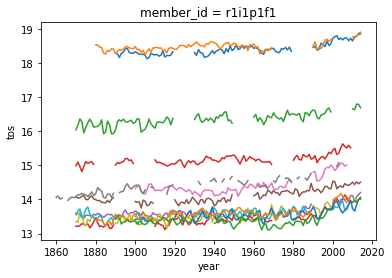

In [38]:
field={}
for m in model_grids.keys():
    ds=dset_dict[m].groupby('time.year').mean('time')
    field[m]=ds.tos.mean(dim=model_grids[m])
    field[m].plot()#.line(hue=m)
    
plt.title('Multi-model ensemble')